# K-Nearest Neighbour

## Introduction

KNN is a simple, supervised ML algorithm that can be used for the classification of data points. This algorithm is also used in missing value imputation which is where missing values in a dataset are regenerated using KNN. The main philosophy behind KNN is that the observations closest to a given data point are the most to the data point itself. This means that we can classify new and unseen data points based on the values of the closest existing points around the new point. By choosing a value of K, the user can select the number of nearby points to take into account when calcuating the class of the new value. 

## How does it work?

The value of K is the number of nearest neighbour data points to use for classification. A majority vote is used to determine which class a new data point should go in. Larger values of K are often more robust to annomolous results and produce more stable decision boundaries than small values of K. However, choosing a good value of K is largely dependent on the specific data we are working with.



## KNN Using the Scikit Learn Module

In [1]:
!pip install matplotlib
!pip install scikit-learn


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


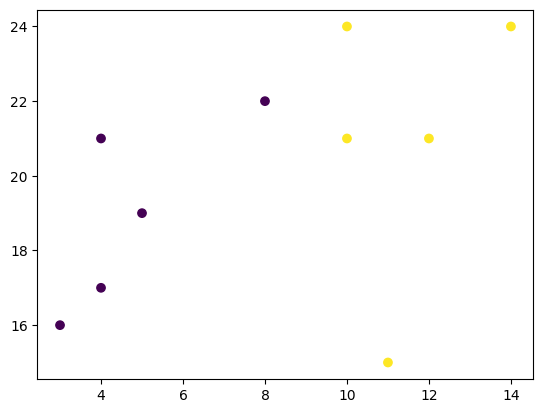

In [3]:
import matplotlib.pyplot as plt

# the first input feature for each data point
x = [4,5,10,4,3,11,14,8,10,12]

# the second input feature for each data point
y = [21,19,24,17,16,15,24,22,21,21]

# the correct classification for each data point
classes = [0,0,1,0,0,1,1,0,1,1]

plt.scatter(x, y, c=classes)
plt.show()


Now we fit (train) an initialised KNN model with a K value of 1

In [7]:
from sklearn.neighbors import KNeighborsClassifier

data = list(zip(x,y))
print(data)

knn = KNeighborsClassifier(n_neighbors=1)

# fit the model with the data
# this means passing the data with the correct class labels into the model
knn.fit(data, classes)

[(4, 21), (5, 19), (10, 24), (4, 17), (3, 16), (11, 15), (14, 24), (8, 22), (10, 21), (12, 21)]


KNeighborsClassifier(n_neighbors=1)

In [8]:
# create a new data point
new_x = 8
new_y = 21
new_point = [(new_x, new_y)]

# ask the model to make a prediction for the class of the new data point
prediction = knn.predict(new_point)

print(prediction)

[0]


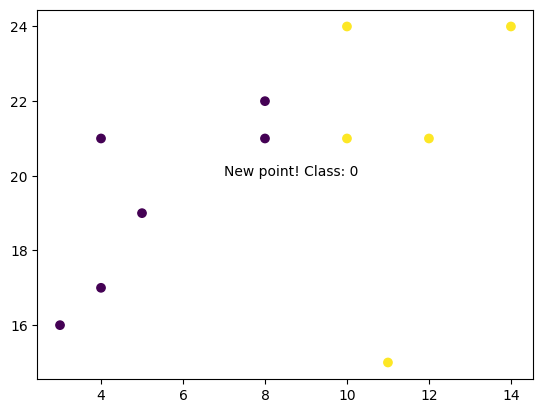

In [23]:
# ass the new point with its class onto the previously generated
plt.scatter(x +[new_x], y + [new_y], c=classes + [prediction[0]])
plt.text(x=new_x-1, y=new_y-1, s=f"New point! Class: {prediction[0]}")
plt.show()

Now we do the same for a larger value of K. Notice how it changes the prediction

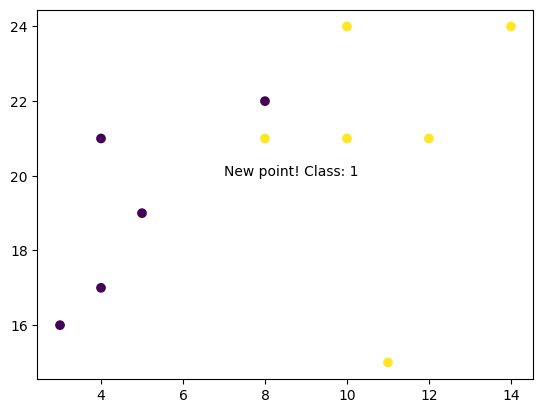

In [24]:
knn = KNeighborsClassifier(n_neighbors=5)

# fit the data to the model
knn.fit(data, classes) 

# make a prediction on the new point
prediction = knn.predict(new_point)

# add the new point to the scatter plot
plt.scatter(x +[new_x], y + [new_y], c=classes + [prediction[0]])
plt.text(x=new_x-1, y=new_y-1, s=f"New point! Class: {prediction[0]}")
plt.show()

## K-Nearest Neighbour using Pure Python

As a bonus exercise take a look at the code below. It implements the KNN algorithm, giving us a behind the scenes look at what happens inside the scilearn library. 

In [25]:
from math import sqrt 

In [27]:
# function to calculate the euclidean distance between two pairs of data points
def euclidean_distance(pairA, pairB):

    return sqrt((pairA[0] - pairB[0])**2 + (pairA[1] - pairB[1])**2)

def get_neighbors(data, test_point, k):

    distances = list()

    for pair in data:

        dist = euclidean_distance(test_point, pair)

        distances.append((pair, dist))

        distances.sort(key=lambda tup: tup[1])

    neighbors = list()

    for i in range(k):
        neighbors.append(distances[i][0])
    
    return neighbors

def predict_classification(train, test_point,k):

    neighbors = get_neighbors(train, test_point, k)

    output_classes = [point[-1] for point in neighbors]
    prediction = max(set(output_classes), key=output_classes.count)
    return prediction


In [28]:
data = list(zip(x,y, classes))

test_point = [10.25,1]

prediction = predict_classification(data, test_point, 3)

print(prediction)


0
